In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def get_data():
    X = [1100,1400,1425,1550,1600,1700,1750,1800,1875,2000,2100,2250,2300,2400,2450,2600,2800,2900,3000,3150,3300]

    Y = [199000,245000,230000,215000,280000,295000,345000,315000,325000,360000,350000,385000,390000,425000,415000,455000,465000,495000,510000,545000,570000]

    return X, Y

In [4]:
def compute_mean(values):
    return sum(values) / len(values)

In [5]:
def compute_std(values, mean):
    n = len(values)
    total = 0.0
    for v in values:
        diff = v - mean
        total += diff * diff
    return (total / n) ** 0.5

In [6]:
def scale_features(X):
    mu = compute_mean(X)
    sigma = compute_std(X, mu)

    X_scaled = []
    for x in X:
        X_scaled.append((x - mu) / sigma)

    return X_scaled, mu, sigma

In [7]:
def compute_cost(X, Y, m, b):
    n = len(X)
    total = 0.0
    for i in range(n):
        y_pred = m * X[i] + b
        diff = y_pred - Y[i]
        total += 0.5 * diff * diff   # 1/2 * diff^2
    return total

In [8]:
def gradient_descent(X, Y, alpha=0.01, iterations=1500):
    n = len(X)
    m = 0.0
    b = 0.0

    cost_history = []

    for _ in range(iterations):
        preds = []
        for i in range(n):
            preds.append(m * X[i] + b)

        errors = []
        for i in range(n):
            errors.append(preds[i] - Y[i])

        m_grad = 0.0
        b_grad = 0.0
        for i in range(n):
            m_grad += errors[i] * X[i]
            b_grad += errors[i]

        m_grad /= n
        b_grad /= n

        m = m - alpha * m_grad
        b = b - alpha * b_grad

        cost = compute_cost(X, Y, m, b)
        cost_history.append(cost)

    return m, b, cost_history

In [9]:
def predict(x, m, b):
    return m * x + b

In [17]:
if __name__ == "__main__":
    lr = 0.01
    iter = 1500
    TARGET_AREA = 2500

    X, Y = get_data()

    X_scaled, mu_X, sigma_X = scale_features(X)

    m_scaled, b_scaled, cost_history = gradient_descent(
        X_scaled, Y,
        alpha=lr,
        iterations=iter
    )

    m_real = m_scaled / sigma_X
    b_real = b_scaled - (m_scaled * mu_X / sigma_X)

    print(f"Slope (m): {m_real:.4f}")
    print(f"Intercept (b): {b_real:.4f}")

    predicted_price = predict(TARGET_AREA, m_real, b_real)

    print(f"Predicted price for a house with {TARGET_AREA} sq ft:")
    print(f"${predicted_price:,.2f}")



Slope (m): 171.1732
Intercept (b): 1627.3676
Predicted price for a house with 2500 sq ft:
$429,560.43


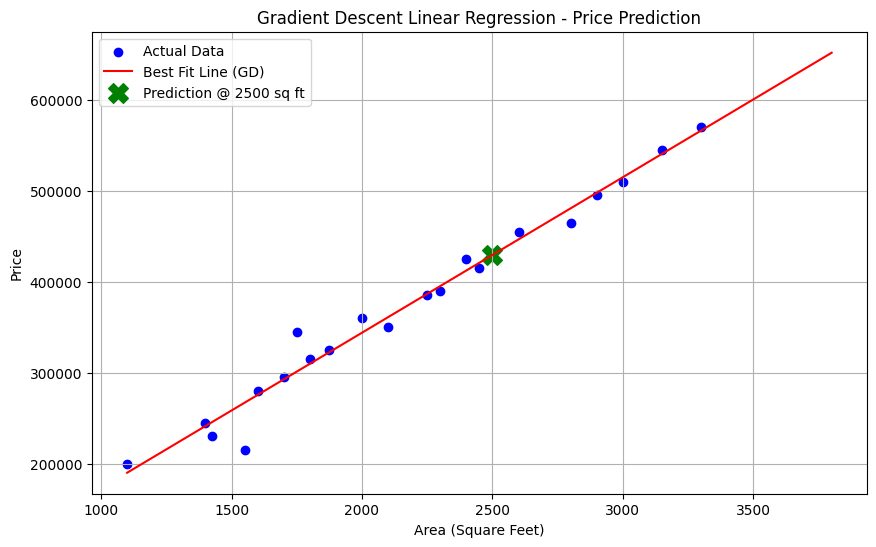

In [18]:
x_line = np.linspace(min(X), max(X) + 500, 100)
y_line = []
for x in x_line:
    y_line.append(predict(x, m_real, b_real))

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color="blue", label="Actual Data")
plt.plot(x_line, y_line, color="red", label="Best Fit Line (GD)")
plt.scatter(TARGET_AREA, predicted_price,
            color="green", marker="X", s=200,
            label=f'Prediction @ {TARGET_AREA} sq ft')

plt.title("Gradient Descent Linear Regression - Price Prediction")
plt.xlabel("Area (Square Feet)")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

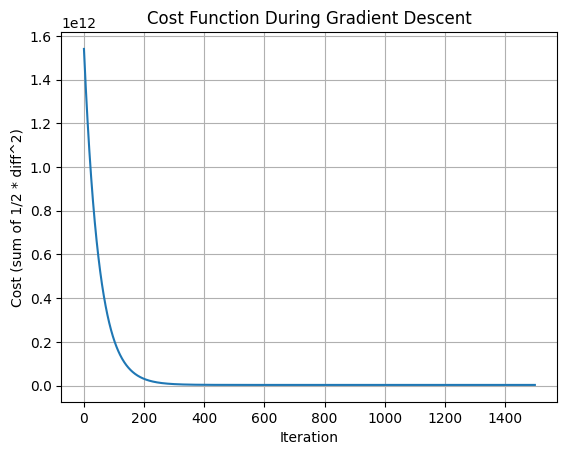

In [13]:
plt.figure()
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost (sum of 1/2 * diff^2)")
plt.title("Cost Function During Gradient Descent")
plt.grid(True)
plt.show()